## **Introduction**

We recently launched a new line of offict stationery focused on fostering creativity and enhancing brainstorming capabilities. To optimize the sales approach for this new product line, we tested three different sales strategies: email, call, and a combination of email and call. The purpose of this analysis is to evaluate the effectiveness of these sales methods and provide insights to inform the sales strategy moving forward.

This report will detail the data validation and cleaning process, present the results of the explaratory data analysis, define a metric for the business to monitor, and provide recommendations based on the findings. By leveraging data-driven insights, we can hopefully make more informed decisions to improve sales performance and ensure the sucess of the new product line.

# **Data Importing and Validation**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#import data
product_sales = pd.read_csv('product_sales.csv')
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [7]:
# product_sales shape
product_sales.shape

(15000, 8)

In [8]:
# product_sales info
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [9]:
# product_sales describe
product_sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [10]:
# product_sales value counts
product_sales['sales_method'].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

In [11]:
# Mapping dictionary to correct the inconsistent values in sales_method
product_sales_mapping = {'Email': 'Email',
                         'Call': 'Call',
                         'Email + Call': 'Email + Call',
                         'em + call': 'Email + Call',
                         'email': 'Email'}
product_sales['sales_method'] = product_sales['sales_method'].map(product_sales_mapping)
product_sales['sales_method'].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

In [12]:
# Find the mean revenue for each sales method
product_sales_revmean = product_sales.groupby('sales_method')['revenue'].mean()

In [13]:
def replace_null_revenue(row):
    """
    Replaces null (NaN) values in the 'revenue' column of a pandas DataFrame with the mean (or median) revenue
    for the corresponding 'sales_method' group.

    Parameters:
    -----------
    row : pandas Series
        A single row of a pandas DataFrame containing the 'revenue' and 'sales_method' columns.

    Returns:
    --------
    float
        The value of the 'revenue' column for the given row, either the original value if it is not null, or
        the mean (or median) revenue for the corresponding 'sales_method' group if it is null.
    """
    if pd.isnull(row['revenue']):
        return product_sales_revmean[row['sales_method']]
    else:
        return row['revenue']

In [14]:
# Apply the function to the dataset
product_sales['revenue'] = product_sales.apply(replace_null_revenue, axis=1)
product_sales['revenue'].isnull().sum() #shows that all null values became mean

0

In [15]:
# Replace all years_as_customer > 39 with 39
product_sales[product_sales['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [16]:
product_sales.loc[product_sales['years_as_customer'] > 39, 'years_as_customer'] = 39

In [17]:
product_sales[product_sales['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [18]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


# **Exploratory Analysis**

### **A. Number of Customers for each Sales Method**

In [21]:
customer_by_method = product_sales['sales_method'].value_counts()
customer_by_method

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

C:\Users\ravch\AppData\Local\Temp\ipykernel_1840\624597005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=customer_by_method, palette='gist_earth')


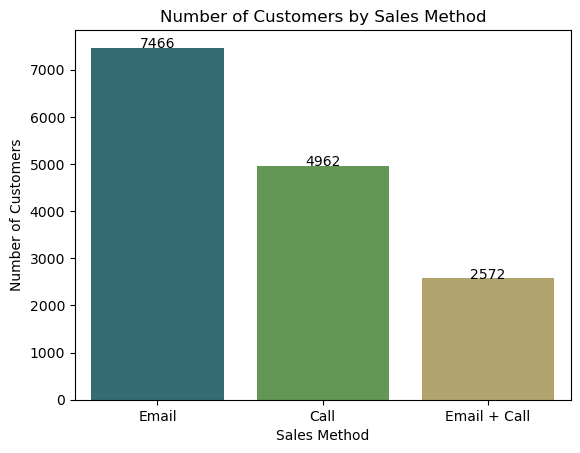

In [22]:
ax = sns.barplot(data=customer_by_method, palette='gist_earth')
plt.title('Number of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')

# Adding values above graph
for i, v in enumerate(customer_by_method.values):
    ax.text(i, v + 0.5, str(v), ha='center')

plt.show()

### **B. What is the spread of revenue overall and for each sales method?**

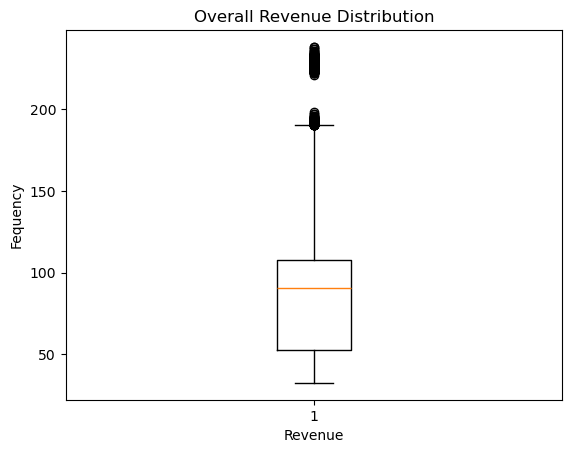

In [24]:
plt.boxplot(product_sales['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Fequency')
plt.title('Overall Revenue Distribution')
plt.show()

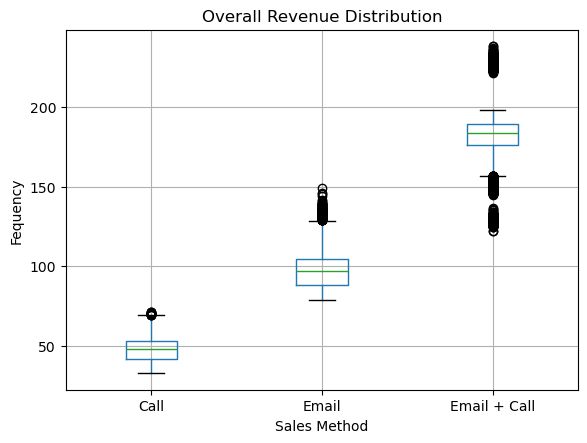

In [25]:
product_sales.boxplot(column='revenue', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Fequency')
plt.title('Overall Revenue Distribution')
plt.suptitle('')
plt.show()

### **C. Revenue over Time For Each Sales Method**

In [60]:
revenue_over_time = product_sales.groupby(['week','sales_method'])['revenue'].sum().unstack()
revenue_over_time

sales_method,Call,Email,Email + Call
week,,,
1,27015.934407,248122.682313,20007.400954
2,35219.944012,148478.487577,31702.115744
3,37865.583880,107047.993157,55164.933140
4,51545.486149,116044.223157,89682.576419
5,55279.216281,80201.111052,147195.006815
6,29252.466808,25260.792947,128598.937094


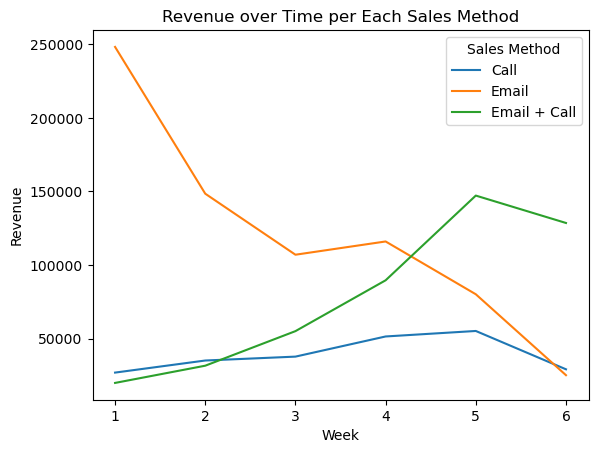

In [76]:
revenue_over_time.plot()
plt.title('Revenue over Time per Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.show()

From the table above we see following:

- In week 1, the 'Email' sales method generated the highest revenue ($48,122.68), followed by 'Email + Call' (20,007.40) and 'Call' (27,015.93). However, it is important to note that the 'Email' method required the least effort from the sales team, making it the most efficient method during the first week.
- Over the course of the 6 weeks sales generated from the Email sales method consistently decreased. This decline in revenue overtime could indicate diminishing returns from the Email sales method as time goes on.
- The call method shows an overall incresing trend in revenue overtime with some fluctations. Towards the end of the 6 week period the amount of revenue generated from the Call method began to decrease.
- The Email + Call method shows a healthy increasing trend of revenue over the 6 week period. It's possible that this method would be the most beneficial in terms of long-term revenue growth compared to the two other sales methods.

In conclusion, the Email + Call sales method appears to be the most promising in terms of long-term revenue generation, although it does require more effort from the sales team. The Email method starts strong but shows a steady decline, while the Call method has an overall increasing trend but fluctuates more. It is recommended to consider the efficiency and effort required for each method while making a decision on which sales method to continue using.

### **D. Investigating other differences between customers in each group**

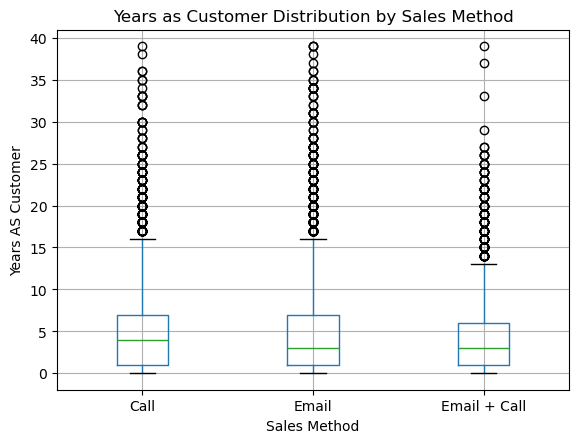

In [101]:
# Years as Customer Distribution by Sales Method
product_sales.boxplot(column='years_as_customer', by='sales_method')
plt.title('Years as Customer Distribution by Sales Method')
plt.suptitle('')
plt.xlabel('Sales Method')
plt.ylabel('Years AS Customer')
plt.show()

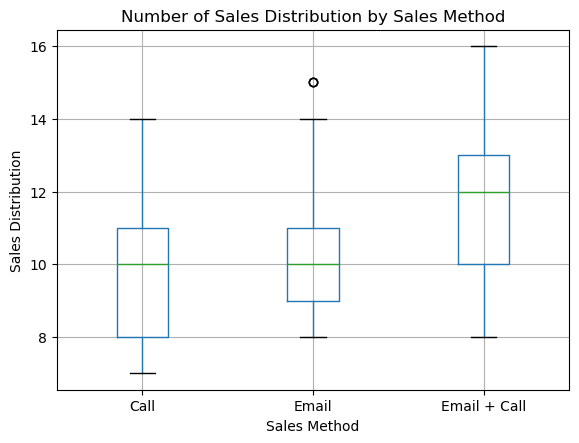

In [111]:
# Number of Sales Distribution by Sales Method
product_sales.boxplot(column='nb_sold', by='sales_method')
plt.title('Number of Sales Distribution by Sales Method')
plt.suptitle('')
plt.xlabel('Sales Method')
plt.ylabel('Sales Distribution')
plt.show()

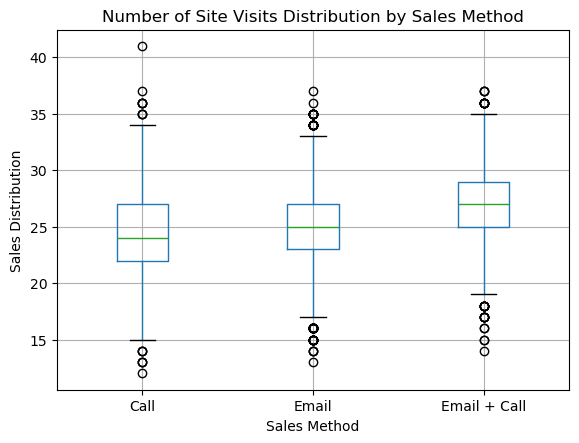

In [117]:
# Number of Site Visits Distribution by Sales Method
product_sales.boxplot(column='nb_site_visits', by='sales_method')
plt.title('Number of Site Visits Distribution by Sales Method')
plt.suptitle('')
plt.xlabel('Sales Method')
plt.ylabel('Number of Site Visits')
plt.show()

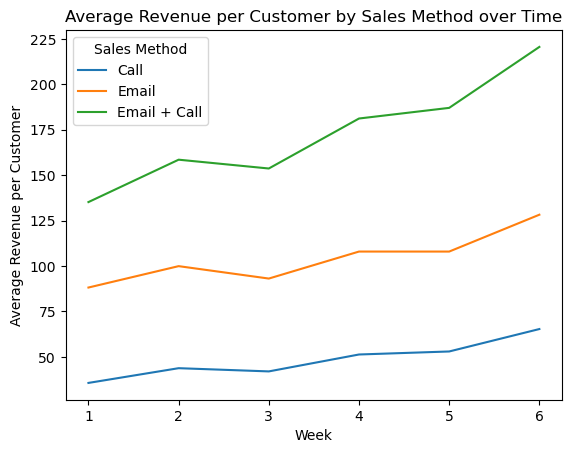

In [155]:
# Average Revenue per Customer by Sales Method over Time
grouped_data = product_sales.groupby(['week','sales_method']).agg({'revenue': 'sum', 'customer_id': 'count'})
grouped_data['average_revenue_per_customer'] = grouped_data['revenue'] / grouped_data['customer_id']
pivot_data = grouped_data.pivot_table(index='week', columns='sales_method', values='average_revenue_per_customer')
pivot_data.plot()
plt.title('Average Revenue per Customer by Sales Method over Time')
plt.xlabel('Week')
plt.ylabel('Average Revenue per Customer')
plt.legend(title='Sales Method')
plt.show()

# **4. Defining Business Metrics to Track Performance - Average Revenue per Customer Sales Effort**

To get a better understanding of the performance of each sales method I create a metric called Average Reveue per Customer Sales Effort(ARPSE). This metric takes into account the difficulty of each sales method in terms of time spent with email having a value of 0.5, email + call 1 and call 3.

**ARCPM = (Total Revenue for Method) / (Number of customers * Sales effort)**

In [174]:
# Define the sales effort for each sales method
sales_effort = {
    'Email': 0.5,
    'Call': 3,
    'Email + Call': 1
}

# Group the data by sales_method and aggregate the total revenue and number of customers
grouped_data = product_sales.groupby('sales_method').agg({'revenue': 'sum', 'customer_id': 'count'}).reset_index()

# Calculate ARCPSE for each sales method
grouped_data['ARCPSE'] = grouped_data.apply(lambda row: row['revenue'] / (row['customer_id'] * sales_effort[row['sales_method']]), axis=1)

# Display the ARCPSE for each sales method
print(grouped_data[['sales_method', 'ARCPSE']])

   sales_method      ARCPSE
0          Call   15.865822
1         Email  194.255368
2  Email + Call  183.651233


The ARCPSE results show that Email has the highest value with 194.25, followed by Email + Call with 183.65 and finally call with 15.86. This suggests that the call method is the most efficient in terms of reveneue generated per unit of effort.

However, it is important to note that additional factors have been observed. The 'Email + Call' method had customers with more website visits and higher average number of items purchased. Moreover, this method demonstrated a steady increase in revenue growth over the six-week period. In contrast, the 'Call' method showed high revenue in week 1 but decreased over time.

### Conclusion and Recommendation

Taking in all factors from the analysis it is recommended to focus on the Email + Call method for the following reasons:

- While 'Email' has the highest ARCPSE, the 'Email + Call' method generates more customer engagement, as evidenced by higher website visits and average items purchased. This could lead to stronger customer relationships and long-term growth.
- The 'Email + Call' method has shown a consistent upward trend in revenue generation over six weeks, indicating its potential for continued success.
- The 'Call' method is the least efficient in terms of effort and revenue generation and has a downward trend in revenue over time. In conclusion, the 'Email + Call' method should be prioritized for sales efforts, as it demonstrates better customer engagement, consistent revenue growth, and a more sustainable balance between effort and return.